# Import

In [2]:
# 기본 세팅
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import gaussian_kde
from matplotlib import colors as mpl_colors
import os
import argparse
from datetime import datetime
from glob import glob


# Font & Color

##### TODO
- font download

In [3]:
# font = {'family': 'Tahoma'}
# font = {'family': 'Times New Roman'}

# plt.rc('font', **font)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
grid_color = 'gainsboro'

### Options

In [ ]:
save_formats = ['png', 'pdf', 'svg']
device = 'nano'
max_cores = 4
models = ['densenet201']

In [20]:
def LayerNum(model):
    if model == "densenet201" :
        return 306
    elif model == "resnet152" :
        return 206
    elif model == "enetb0" :
        return 136
    elif model == "csmobilenet-v2" :
        return 81
    elif model == "squeezenet" :
        return 50
    elif model == "yolov7" :
        return 143
    elif model == "yolov7-tiny" :
        return 99
    elif model == "yolov4" :
        return 162
    elif model == "yolov4-tiny" :
        return 38
    elif model == "resnet10" :
        return 17
    elif model == "yolov2-tiny" :
        return 16
    else :
        print("Unknown model: ", model)
        return 0
    
for model in models:
    for save_format in save_formats:
        directory_path = f'./{model}/{save_format}'
        if not os.path.exists(directory_path):
            os.makedirs(directory_path)
            print(f"디렉터리 '{directory_path}' 생성 완료!")
        else:
            print(f"디렉터리 '{directory_path}'가 이미 존재합니다.")

디렉터리 './densenet201/png'가 이미 존재합니다.
디렉터리 './densenet201/pdf'가 이미 존재합니다.
디렉터리 './densenet201/svg'가 이미 존재합니다.


# Load csv & Dataframe 생성

In [6]:
model = 'densenet201'
date = 'data-0107'

In [ ]:
gpu_file_path = f"../../csv/{date}/layer_time/{model}/gpu_raw_data.csv"
cpu_file_path = f"../../csv/{date}/layer_time/{model}/cpu_raw_data_01blas.csv"

In [18]:
gpu_data = pd.read_csv(gpu_file_path)

# 평균값을 저장할 배열
differences = []

# 각 layer에 대한 평균 계산
for i in range(LayerNum(model)):
    column_name = f"layer[{i}]"
    mean_value = gpu_data[column_name].mean()
    differences.append(mean_value)

cpu_data = pd.read_csv(cpu_file_path)

# 평균값을 저장할 배열
layer_means = []
# 각 layer에 대한 평균 계산
for i in range(LayerNum(model)):
    column_name = f"layer[{i}]"
    mean_value = cpu_data[column_name].mean()
    layer_means.append(mean_value)

x_data = list(range(len(layer_means)))

acceleration_ratio = []
for i in range(LayerNum(model)):
    ratio = layer_means[i]/differences[i]
    acceleration_ratio.append(ratio)

# Graph

##### Layer Time

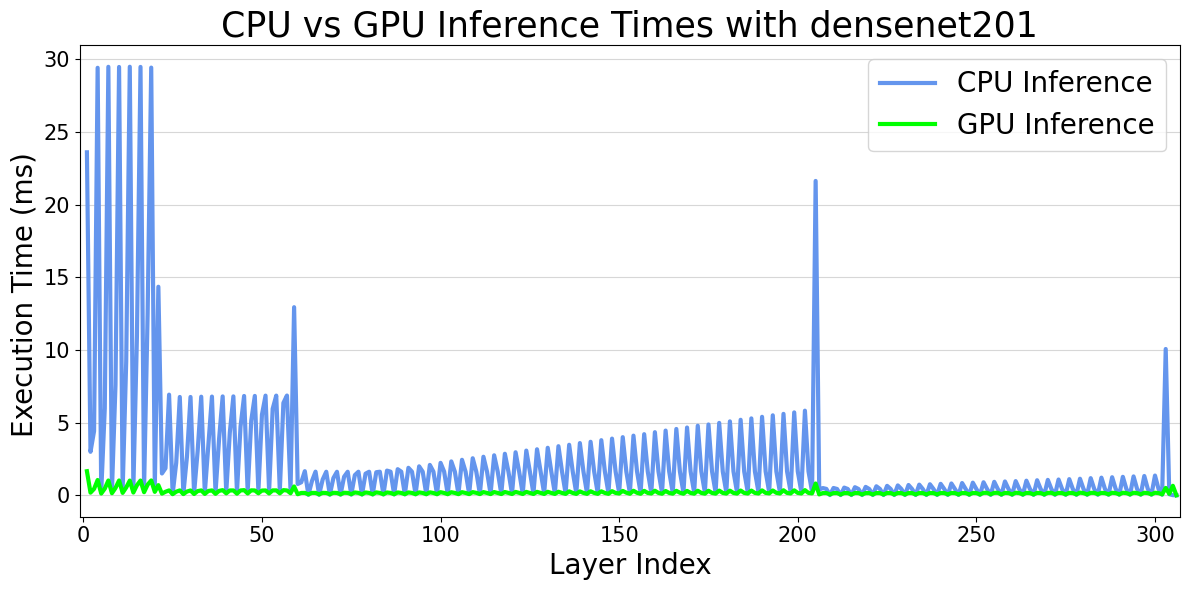

In [15]:
layer_array = list(range(1, len(layer_means) + 1)) 
plt.figure(figsize=(12, 6))
plt.plot(layer_array, layer_means, label='CPU Inference', color = "cornflowerblue", linewidth=3)
plt.plot(layer_array, differences, label='GPU Inference', color = "lime", linewidth=3)
plt.xlim(-1, 307)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Layer Index', size=20)
plt.ylabel('Execution Time (ms)   ', size=20)
plt.title(f'CPU vs GPU Inference Times with {model}', size=25)
plt.grid(True, axis='y', alpha = 0.5)
plt.legend(fontsize=20, ncol=1, frameon=True)

plt.tight_layout()

for save_format in save_formats:
    plt.savefig(f'./{model}/{save_format}/8.LayerTime_{device}_{model}.{save_format}')